In [3]:
import numpy as np # linear algebra
import pandas as pd

In [6]:
def load_data(datapath):
    data = pd.read_csv(datapath)
   # Dimensions
    print('Shape:', data.shape)
    # Set of features we have are: date, store, and item
    display(data.sample(10))
    return data
traindf=load_data('/train.csv')
testdf=load_data('/test.csv')
featuresdf=load_data('/features.csv')
storesdf=load_data('/stores.csv')

Shape: (421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
111928,12,30,2011-02-04,7280.96,False
25986,3,42,2011-12-23,2693.28,False
238686,25,12,2010-05-28,3864.54,False
67109,7,83,2010-10-01,6.00,False
342808,36,25,2010-12-03,3.25,False
233029,24,49,2012-03-09,4206.53,False
51080,6,18,2010-02-26,1078.86,False
328856,34,81,2012-09-14,16472.54,False
224538,23,74,2010-08-06,46283.44,False
327151,34,55,2010-11-05,9920.15,False


Shape: (115064, 4)


,Store,Dept,Date,IsHoliday
59461,23,10,2013-01-18,False
46166,18,16,2013-05-24,False
76823,29,36,2012-12-21,False
21538,9,3,2012-11-09,False
23131,9,52,2012-12-21,False
39524,15,60,2013-06-28,False
41060,16,21,2013-07-19,False
46696,18,30,2013-03-01,False
31838,12,92,2013-01-11,False
17761,7,52,2013-03-15,False


Shape: (8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
6661,37,2012-03-09,63.19,3.669,1024.83,2.00,10.70,NaN,2304.93,219.743731,7.244,False
4535,25,2013-04-19,56.15,3.676,4568.42,196.17,20.68,88.00,948.87,217.742295,7.191,False
3896,22,2011-07-08,74.22,3.784,NaN,NaN,NaN,NaN,NaN,139.544208,8.023,False
3209,18,2012-04-20,60.88,4.046,9959.48,11361.33,10.57,203.57,2562.42,137.923067,8.304,False
4970,28,2011-03-04,51.72,3.674,NaN,NaN,NaN,NaN,NaN,128.264750,14.021,False
3097,18,2010-02-26,35.42,2.753,NaN,NaN,NaN,NaN,NaN,131.686000,9.202,False
3469,20,2010-04-23,50.65,2.902,NaN,NaN,NaN,NaN,NaN,203.690559,7.856,False
6165,34,2013-02-22,47.26,3.602,5516.88,2250.61,31.12,1948.57,4175.42,132.320071,8.934,False
7137,40,2010-11-05,36.45,2.938,NaN,NaN,NaN,NaN,NaN,132.924581,5.287,False
7260,40,2013-03-15,34.03,3.843,7586.97,NaN,3.50,4040.62,2540.23,138.859774,3.932,False


Shape: (45, 3)


,Store,Type,Size
42,43,C,41062
11,12,B,112238
32,33,A,39690
0,1,A,151315
15,16,B,57197
23,24,A,203819
16,17,B,93188
4,5,B,34875
29,30,C,42988
18,19,A,203819


Mounted at /content/drive


In [9]:
traindf1=traindf.merge(featuresdf,how='left',indicator=True).merge(storesdf,how='left') # Merging the features and training data to get cumulative insights from overall
traindf1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,_merge,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,both,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,both,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,both,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,both,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,both,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,both,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,both,B,118221


In [10]:
traindf2=traindf1.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)
traindf2.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
_merge          0
Type            0
Size            0
dtype: int64

In [11]:
traindf2.loc[traindf2['Weekly_Sales']<=0]  #outliers

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,_merge,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,221.958433,6.908,both,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,221.671800,7.143,both,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,211.289143,8.106,both,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,211.380643,8.106,both,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,211.746754,7.838,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,181.982317,8.992,both,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,182.034782,8.992,both,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,181.692477,8.899,both,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,182.318780,8.743,both,B,118221


In [12]:
traindf3=traindf2.loc[traindf2['Weekly_Sales']>0]
traindf4=traindf3.drop(['_merge'],axis=1)
traindf4.sort_values(by='Date')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
140804,15,21,2010-02-05,3253.19,False,19.83,2.954,131.527903,8.350,B,123737
140661,15,20,2010-02-05,4606.90,False,19.83,2.954,131.527903,8.350,B,123737
140518,15,19,2010-02-05,1381.40,False,19.83,2.954,131.527903,8.350,B,123737
140408,15,18,2010-02-05,2239.25,False,19.83,2.954,131.527903,8.350,B,123737
...,...,...,...,...,...,...,...,...,...,...,...
173673,18,52,2012-10-26,2226.10,False,56.09,3.917,138.728161,8.243,B,120653
342211,36,16,2012-10-26,564.50,False,74.39,3.494,222.113657,6.228,A,39910
390158,41,92,2012-10-26,131128.24,False,41.80,3.686,199.219532,6.195,A,196321
175485,18,81,2012-10-26,14036.52,False,56.09,3.917,138.728161,8.243,B,120653


In [13]:
traindf4['Type'].unique() #Store varities

array(['A', 'B', 'C'], dtype=object)

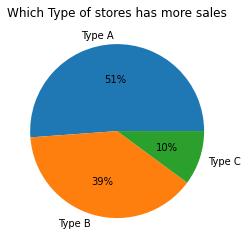

In [20]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np


# Creating dataset
stores = ['Type A','Type B','Type C']

data = traindf4['Type'].value_counts()

# Creating plot
fig, ax = plt.subplots()
plt.pie(data, labels = stores,autopct='%.0f%%')
ax.set_title('Which Type of stores has more sales')
# show plot
plt.show()

In [14]:
traindf4['year'] = pd.DatetimeIndex(traindf4['Date']).year #Separating year data.

                 Store      Dept  Weekly_Sales  IsHoliday  Temperature  \
Store         1.000000  0.024258     -0.085117  -0.000522    -0.050230   
Dept          0.024258  1.000000      0.148749   0.000663     0.004727   
Weekly_Sales -0.085117  0.148749      1.000000   0.012843    -0.002339   
IsHoliday    -0.000522  0.000663      0.012843   1.000000    -0.155775   
Temperature  -0.050230  0.004727     -0.002339  -0.155775     1.000000   
Fuel_Price    0.065321  0.003544      0.000089  -0.078155     0.143700   
CPI          -0.211261 -0.007178     -0.021162  -0.001933     0.182223   
Unemployment  0.208759  0.007787     -0.025806   0.010555     0.096768   
Size         -0.182763 -0.002491      0.244117   0.000797    -0.058413   
year          0.002831  0.003716     -0.010015  -0.056572     0.065712   

              Fuel_Price       CPI  Unemployment      Size      year  
Store           0.065321 -0.211261      0.208759 -0.182763  0.002831  
Dept            0.003544 -0.007178      0.0

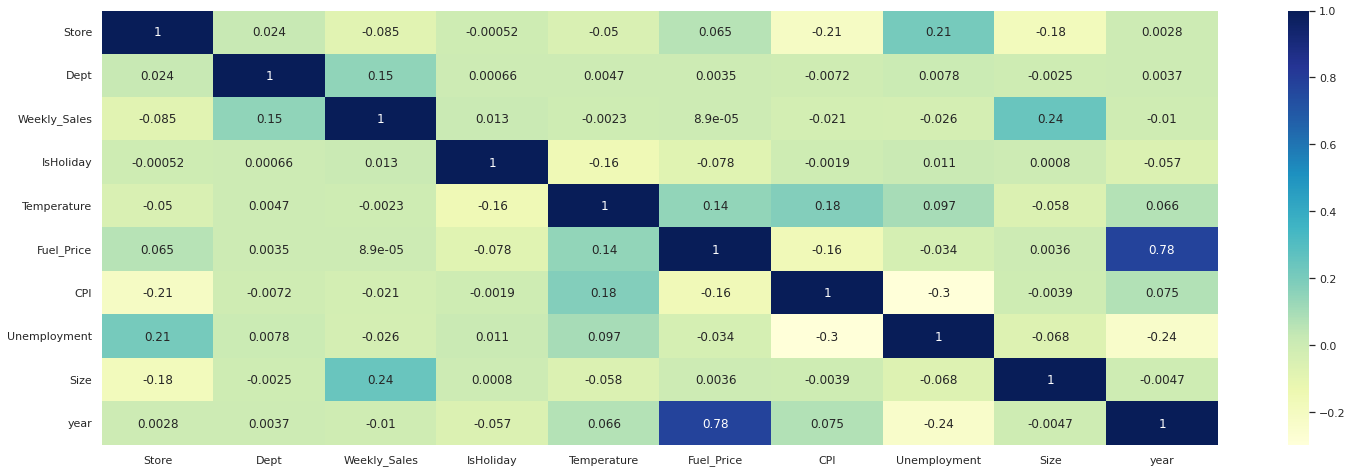

In [16]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns

# import file with data
data = traindf4

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(50,8)})

# displaying heatmap
mp.show()

In [17]:
print(traindf4.dtypes)

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
year              int64
dtype: object


**Year vs Fuel_price**

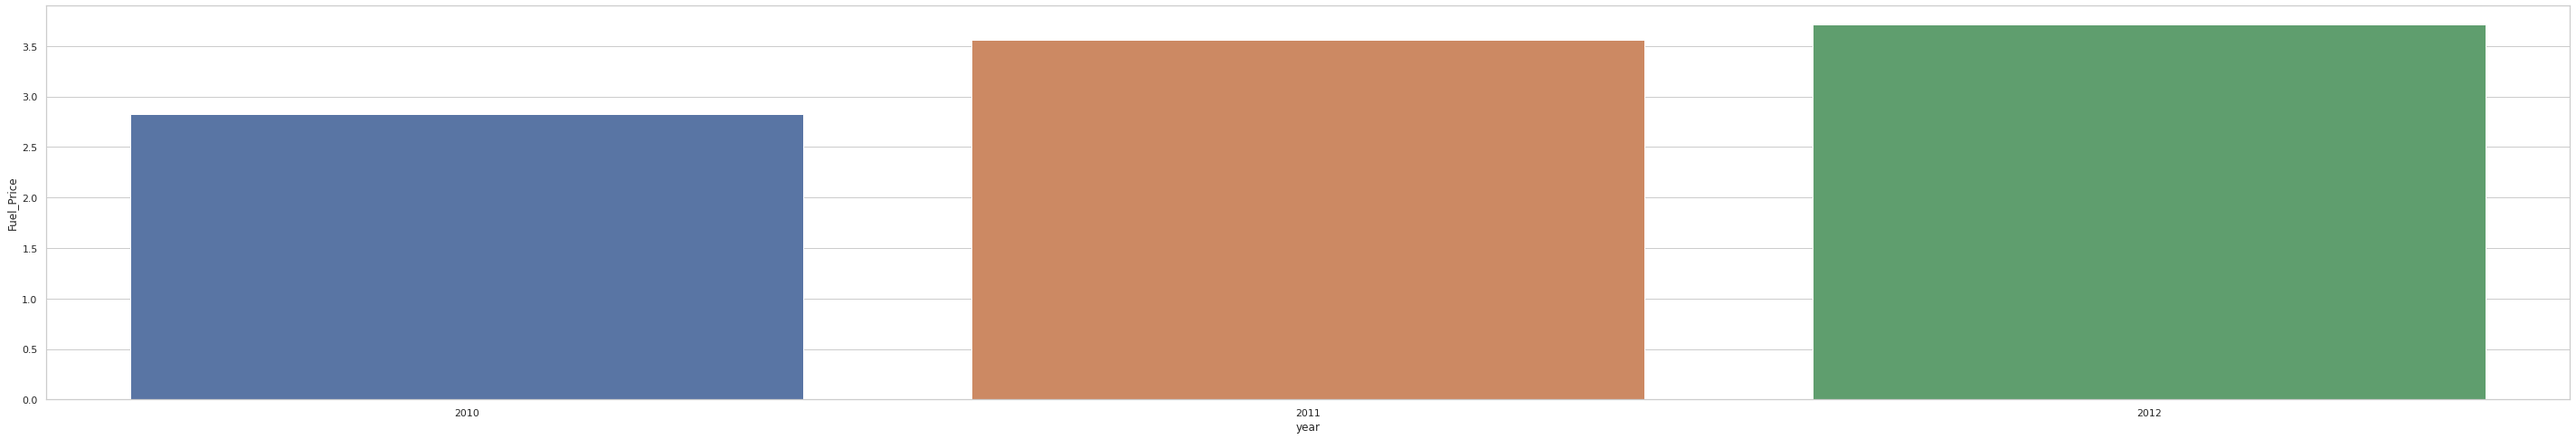

In [18]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips =traindf4
ax = sns.barplot(x="year", y="Fuel_Price", data=tips)
sns.set(rc = {'figure.figsize':(10,4)})

**Weekly sales vs Store**

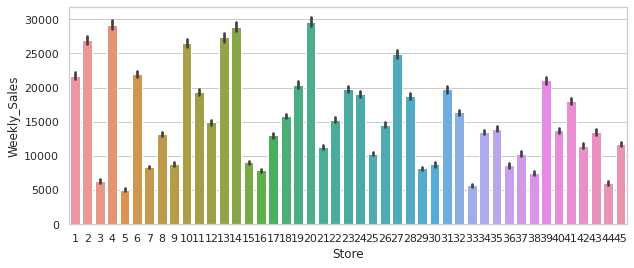

In [19]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = traindf4
ax = sns.barplot(x='Store', y="Weekly_Sales", data=tips)

**Store vs Unemployment**

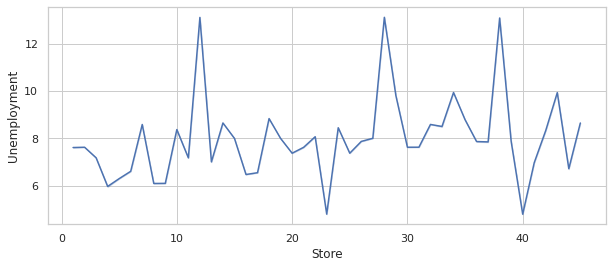

In [20]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = traindf4

# draw lineplot
sns.lineplot(x="Store", y="Unemployment", data=data)
plt.show()

In [21]:
traindf4['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65])

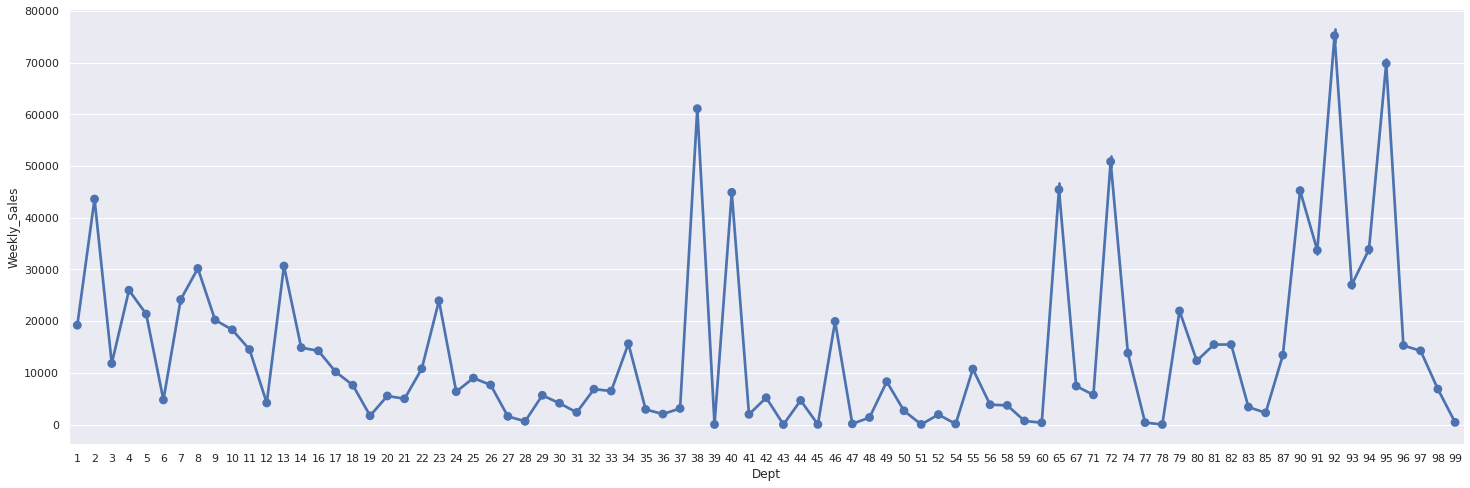

In [23]:
# importing required packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data =traindf4

# draw pointplot
sns.pointplot(x ='Dept',
			y = "Weekly_Sales",
			data = data)
# show the plot
sns.set(rc = {'figure.figsize':(50,8)})
plt.show()

In [32]:
traindf5=traindf4.drop(['Date'],axis=1)

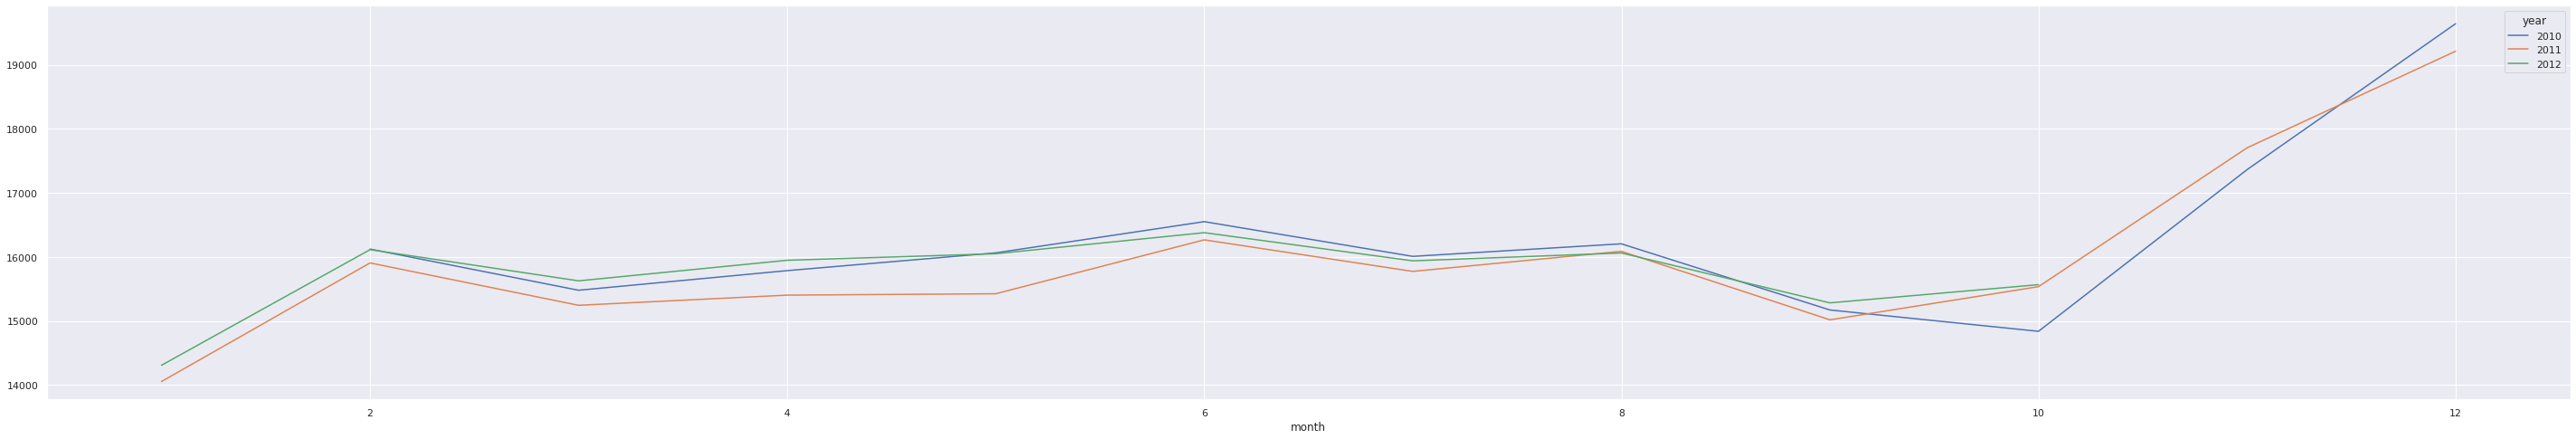

In [31]:
month_wise_sales = pd.pivot_table(traindf5, values = "Weekly_Sales", columns = "year", index = "month")
month_wise_sales.plot()

**Label encoding for Holiday column and Type**

In [33]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
traindf5['IsHoliday']= label_encoder.fit_transform(traindf5['IsHoliday'])
traindf5['Type']= label_encoder.fit_transform(traindf5['Type'])

traindf5

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315,2010,2,5
1,1,1,46039.49,1,38.51,2.548,211.242170,8.106,0,151315,2010,2,6
2,1,1,41595.55,0,39.93,2.514,211.289143,8.106,0,151315,2010,2,7
3,1,1,19403.54,0,46.63,2.561,211.319643,8.106,0,151315,2010,2,8
4,1,1,21827.90,0,46.50,2.625,211.350143,8.106,0,151315,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,64.88,3.997,192.013558,8.684,1,118221,2012,9,39
421566,45,98,628.10,0,64.89,3.985,192.170412,8.667,1,118221,2012,10,40
421567,45,98,1061.02,0,54.47,4.000,192.327265,8.667,1,118221,2012,10,41
421568,45,98,760.01,0,56.47,3.969,192.330854,8.667,1,118221,2012,10,42


**Correlation Map 2**

                 Store      Dept  Weekly_Sales  IsHoliday  Temperature  \
Store         1.000000  0.024258     -0.085117  -0.000522    -0.050230   
Dept          0.024258  1.000000      0.148749   0.000663     0.004727   
Weekly_Sales -0.085117  0.148749      1.000000   0.012843    -0.002339   
IsHoliday    -0.000522  0.000663      0.012843   1.000000    -0.155775   
Temperature  -0.050230  0.004727     -0.002339  -0.155775     1.000000   
Fuel_Price    0.065321  0.003544      0.000089  -0.078155     0.143700   
CPI          -0.211261 -0.007178     -0.021162  -0.001933     0.182223   
Unemployment  0.208759  0.007787     -0.025806   0.010555     0.096768   
Type          0.226352  0.003157     -0.182229  -0.001000     0.043035   
Size         -0.182763 -0.002491      0.244117   0.000797    -0.058413   
year          0.002831  0.003716     -0.010015  -0.056572     0.065712   
month         0.000907  0.000800      0.028401   0.123058     0.235957   
week          0.000926  0.000767      

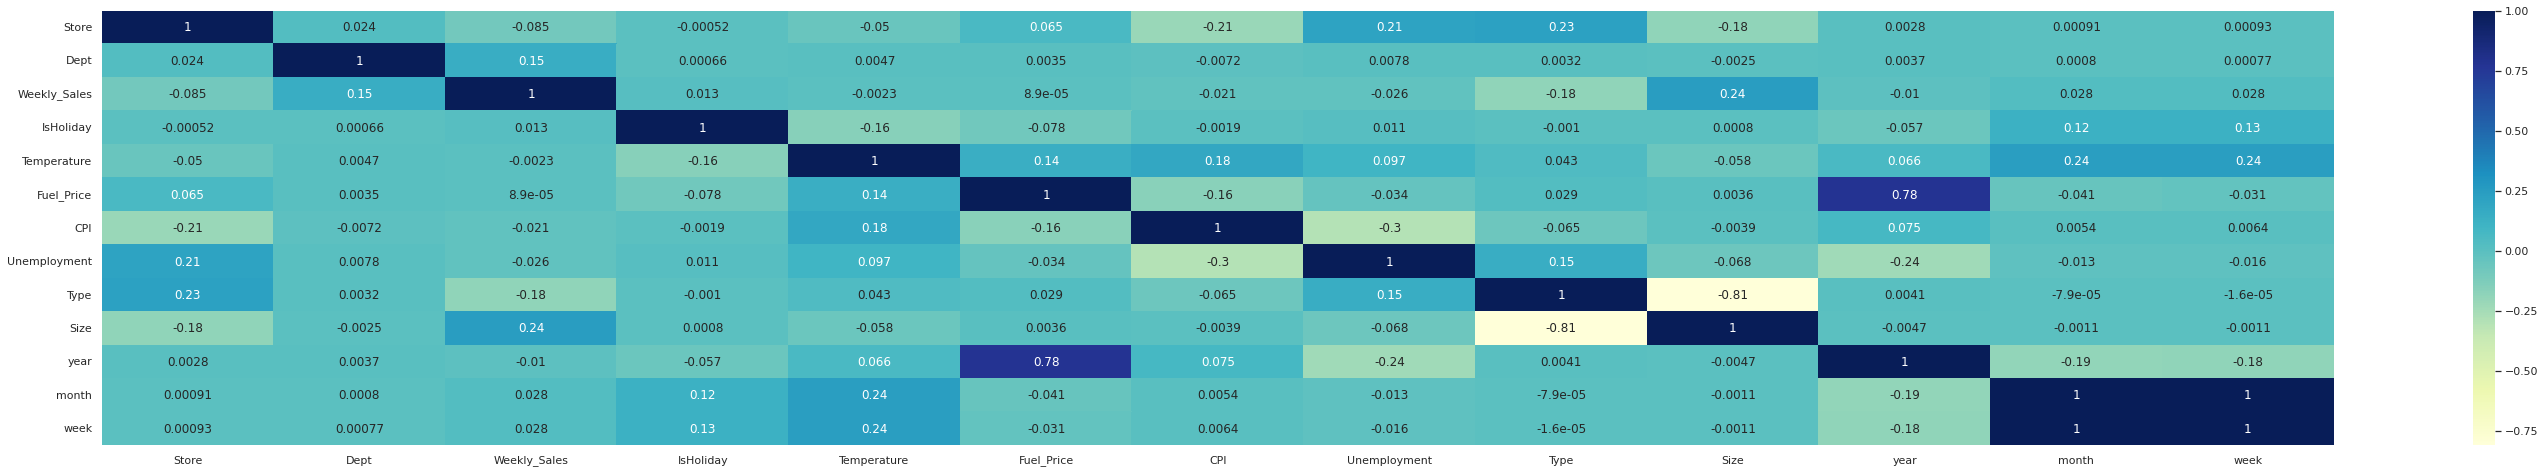

In [34]:
data = traindf5

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(25,8)})

# displaying heatmap
mp.show()

**Feature Importance Test using various techniques**

In [40]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor

Features=traindf5.drop(['Weekly_Sales'],axis=1)
Target=traindf5['Weekly_Sales']


In [41]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(Features,Target)

RandomForestRegressor()

In [42]:
Features


,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,0,42.31,2.572,211.096358,8.106,0,151315,2010,2,5
1,1,1,1,38.51,2.548,211.242170,8.106,0,151315,2010,2,6
2,1,1,0,39.93,2.514,211.289143,8.106,0,151315,2010,2,7
3,1,1,0,46.63,2.561,211.319643,8.106,0,151315,2010,2,8
4,1,1,0,46.50,2.625,211.350143,8.106,0,151315,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,0,64.88,3.997,192.013558,8.684,1,118221,2012,9,39
421566,45,98,0,64.89,3.985,192.170412,8.667,1,118221,2012,10,40
421567,45,98,0,54.47,4.000,192.327265,8.667,1,118221,2012,10,41
421568,45,98,0,56.47,3.969,192.330854,8.667,1,118221,2012,10,42


<BarContainer object of 12 artists>

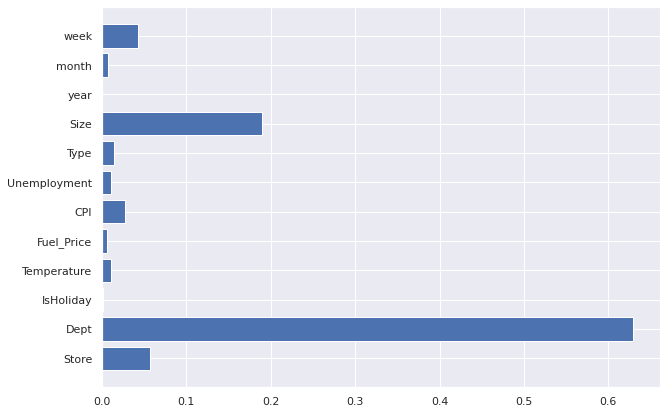

In [43]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.barh(Features.columns, rf.feature_importances_)

In [45]:
F=Features.drop(["IsHoliday",'year'],axis=1)
F

,Store,Dept,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,month,week
0,1,1,42.31,2.572,211.096358,8.106,0,151315,2,5
1,1,1,38.51,2.548,211.242170,8.106,0,151315,2,6
2,1,1,39.93,2.514,211.289143,8.106,0,151315,2,7
3,1,1,46.63,2.561,211.319643,8.106,0,151315,2,8
4,1,1,46.50,2.625,211.350143,8.106,0,151315,3,9
...,...,...,...,...,...,...,...,...,...,...
421565,45,98,64.88,3.997,192.013558,8.684,1,118221,9,39
421566,45,98,64.89,3.985,192.170412,8.667,1,118221,10,40
421567,45,98,54.47,4.000,192.327265,8.667,1,118221,10,41
421568,45,98,56.47,3.969,192.330854,8.667,1,118221,10,42


In [46]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(F, Target, test_size= 0.25, random_state=0)

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [48]:
DTRmodel = DecisionTreeRegressor(max_depth=3,random_state=0)
DTRmodel.fit(x_train,y_train)
y_pred = DTRmodel.predict(x_test)

In [49]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.3796166061691
MSE score  : 323184793.8287025
RMSE:  17977.34112233237


In [50]:
rf1 = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)
rf1.fit(x_train,y_train)
y_pred1 = rf1.predict(x_test)

In [51]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred1))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred1)))

R2 score  : 0.3796166061691
MSE score  : 62845166.705938146
RMSE:  7927.494352311968


In [65]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train,y_train)

[18:46:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [53]:
y_pred2 = model.predict(x_test)

In [54]:
print("R2 score  :",r2_score(y_test, y_pred2))
print("MSE score  :",mean_squared_error(y_test, y_pred2))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred2)))

R2 score  : 0.7482160978849157
MSE score  : 131165226.70274726
RMSE:  11452.738829762393


In [55]:
y_pred2

array([23775.074 ,  1963.2456, 23540.928 , ...,  8145.763 ,  6304.2124,
        6690.6167], dtype=float32)

In [56]:
#Regularization
from sklearn.linear_model import Ridge
rr_model = Ridge(alpha=0.5)
rr_model.fit(x_train,y_train)

Ridge(alpha=0.5)

In [58]:
y_pred3 = model.predict(x_test)
y_pred3

array([23775.074 ,  1963.2456, 23540.928 , ...,  8145.763 ,  6304.2124,
        6690.6167], dtype=float32)

In [59]:
print("R2 score  :",r2_score(y_test, y_pred3))
print("MSE score  :",mean_squared_error(y_test, y_pred3))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred3)))

R2 score  : 0.7482160978849157
MSE score  : 131165226.70274726
RMSE:  11452.738829762393
